In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

## Dataset

In [2]:
dataset = MNIST(root = '.' , download = True , transform = ToTensor())

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
dataset[0][0].size()

torch.Size([1, 28, 28])

In [5]:
import matplotlib.pyplot as plt

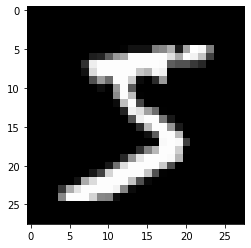

In [6]:
plt.imshow(dataset[0][0][0,:,:] , cmap = 'gray')

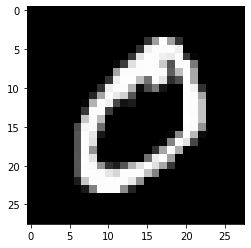

In [7]:
plt.imshow(dataset[1][0][0,:,:] , cmap = 'gray')

In [8]:
np.random.permutation(100)

array([47, 93, 34, 54, 84, 96, 64,  4, 95, 87, 12, 56, 19, 16, 71, 78, 72,
       60, 24, 30, 41, 46, 28, 52, 38, 90, 39, 17, 70, 20, 77, 42, 57, 22,
        5, 48, 69, 85, 18, 44, 58, 82, 27, 68, 11, 45, 61, 97, 86, 83, 75,
       59, 89, 66,  7, 13, 79,  3, 31, 92, 29, 23, 25, 51, 14, 94, 99, 26,
        2,  0,  1, 40, 43, 67, 49,  8, 73, 65, 10, 98, 21, 50, 32, 91, 80,
       33,  6, 74, 88, 36, 53, 62, 81,  9, 35, 55, 63, 37, 76, 15])

## Splitting into Training and Validation Set

In [9]:
def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [10]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [11]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [12]:
batch_size=100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices) # random shulffes and creates a sample
train_dl = DataLoader(dataset, 
                      batch_size, 
                      sampler=train_sampler) # a sampler is passed to let pytorch know that it has to only use the subset determined by these indexes

# Validation sampler and data loader
valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset,
                    batch_size, 
                    sampler=valid_sampler)

In [13]:
for i in train_dl:
    print(i[0].shape)
    break

torch.Size([100, 1, 28, 28])


In [14]:
t = torch.Tensor([-1,11,-3.12])
torch.relu(t)

tensor([ 0., 11.,  0.])

## Neual Network

In [15]:
class DigitModel(nn.Module):
    def __init__(self , input_size , hidden_size , output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size , hidden_size)
        self.linear2 = nn.Linear(hidden_size , output_size)
    
    
    def forward(self , batch):
        batch = batch.view(batch.size(0), -1)
        out = self.linear1(batch)
        out = F.relu(out)
        out = self.linear2(out)
        return out
        
        

![title](Images/ANN.png)

In [20]:
input_size = 28*28
hidden_size = 16
output_size = 10


In [21]:
model = DigitModel(input_size , hidden_size , output_size)

In [22]:
list(model.parameters()) # conains all randomly initialized weights and biases required by the neural network

[Parameter containing:
 tensor([[-0.0316,  0.0338, -0.0149,  ...,  0.0161,  0.0239,  0.0295],
         [ 0.0100,  0.0019, -0.0074,  ..., -0.0148,  0.0028, -0.0249],
         [-0.0324, -0.0245,  0.0170,  ...,  0.0207, -0.0130, -0.0056],
         ...,
         [-0.0273,  0.0302,  0.0187,  ..., -0.0325, -0.0173,  0.0118],
         [ 0.0256, -0.0041, -0.0190,  ...,  0.0097, -0.0166, -0.0107],
         [ 0.0333,  0.0013, -0.0144,  ..., -0.0257, -0.0119,  0.0308]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0201,  0.0043, -0.0103, -0.0056,  0.0054,  0.0072,  0.0070, -0.0063,
          0.0042,  0.0225,  0.0175,  0.0257, -0.0102,  0.0045,  0.0216, -0.0036],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0800,  0.2392,  0.2202, -0.2025, -0.2283,  0.1583, -0.1217, -0.2293,
           0.2112, -0.2326, -0.1119,  0.1451,  0.1624, -0.0841, -0.0054,  0.0958],
         [ 0.0224,  0.1546, -0.0971, -0.0417,  0.0174, -0.0899, -0.2392,  0.2136,
           0.2182, -0.

In [23]:
for i in model.parameters():
    print(i.size())

torch.Size([16, 784])
torch.Size([16])
torch.Size([10, 16])
torch.Size([10])


## Inital Loss

In [24]:
for images, labels in train_dl:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Initially Loss:', loss.item())
    break

print(labels[-1].item())
print(outputs.shape)
print(outputs[-1 , :]) # gives vector with length 10 , representing the probability of each of the digit .
                       # Since probabilty needs to be between [0-1] with the sum as 1 , Apply Softmax

Initially Loss: 2.327221632003784
5
torch.Size([100, 10])
tensor([-0.1461, -0.2489, -0.1289,  0.2690,  0.0054,  0.0293,  0.0290, -0.0866,
        -0.0108, -0.1782], grad_fn=<SliceBackward>)


In [25]:
print(F.softmax(outputs[-1 , :]))

tensor([0.0896, 0.0809, 0.0912, 0.1358, 0.1043, 0.1068, 0.1068, 0.0951, 0.1026,
        0.0868], grad_fn=<SoftmaxBackward>)


/home/aryanshridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [26]:
torch.cuda.is_available()

False

## SGD Optimizer

In [27]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

## Training On CPU :(

In [28]:
for i in range(0,16):
    for batch,label in train_dl:
        pred = model(batch)
        loss = F.cross_entropy(pred , label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if i%2 == 0:
        print(loss.item())

1.275739073753357
0.5185460448265076
0.30593499541282654
0.3715161979198456
0.35268595814704895
0.29438430070877075
0.3017854392528534
0.20351512730121613


## Corrected Weights and Biases

In [29]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0316,  0.0338, -0.0149,  ...,  0.0161,  0.0239,  0.0295],
        [ 0.0100,  0.0019, -0.0074,  ..., -0.0148,  0.0028, -0.0249],
        [-0.0324, -0.0245,  0.0170,  ...,  0.0207, -0.0130, -0.0056],
        ...,
        [-0.0273,  0.0302,  0.0187,  ..., -0.0325, -0.0173,  0.0118],
        [ 0.0256, -0.0041, -0.0190,  ...,  0.0097, -0.0166, -0.0107],
        [ 0.0333,  0.0013, -0.0144,  ..., -0.0257, -0.0119,  0.0308]],
       requires_grad=True), Parameter containing:
tensor([-0.2216, -0.0352, -0.0839, -0.0143,  0.0783, -0.0128,  0.1347,  0.1602,
         0.0447,  0.0908, -0.0056,  0.2974, -0.0123, -0.0718,  0.2323,  0.2639],
       requires_grad=True), Parameter containing:
tensor([[ 0.3665,  0.2630,  0.9244, -0.3226, -0.5022,  0.3735, -0.3261, -0.8614,
          0.4103, -0.5219, -0.1969,  0.5567,  0.1742, -0.2413, -0.1192,  0.2713],
        [-0.5424,  0.1447, -0.3634, -0.0579,  0.3328, -0.3012, -0.6018,  1.0771,
          0.5277, -0.2415, -0.0993, -0

## Accuracy On Validation Set

In [38]:
correct = 0
total = 0
for test,label in valid_dl:
    pred = model(test)
    for i in range(len(pred)):
        _ , prediction = torch.max(pred[i] , dim = 0)
        if prediction.item() == label[i].item():
            correct += 1
        total += 1

In [43]:
print(f'Accuracy is {round((correct/total)*100)}%')

Accuracy is 91%
